In [1]:
%cd ..
%matplotlib nbagg

/home/elias/work/data_science


In [2]:
from pathlib import Path
from glob import glob

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage
from PIL import Image

In [3]:
data_folder = Path('data/x_train/')
image_base_folder = data_folder / 'images'
features_base_folder = data_folder / 'features'

image_paths = glob(str(image_base_folder / '*'))
print(len(image_paths))

clinical_df = pd.read_csv(features_base_folder / 'clinical_data.csv')
print(clinical_df.shape)

results = pd.read_csv("data/y_train.csv")

300
(300, 7)


In [24]:
np.expand_dims(scan, axis=1).shape

(92, 1, 92, 92)

In [32]:
sampled = np.hstack([np.expand_dims(archive['scan'], axis=1), np.expand_dims(archive['mask'], axis=1)])

In [36]:
len(list(sampled))

92

(92, 92, 92)


<IPython.core.display.Javascript object>


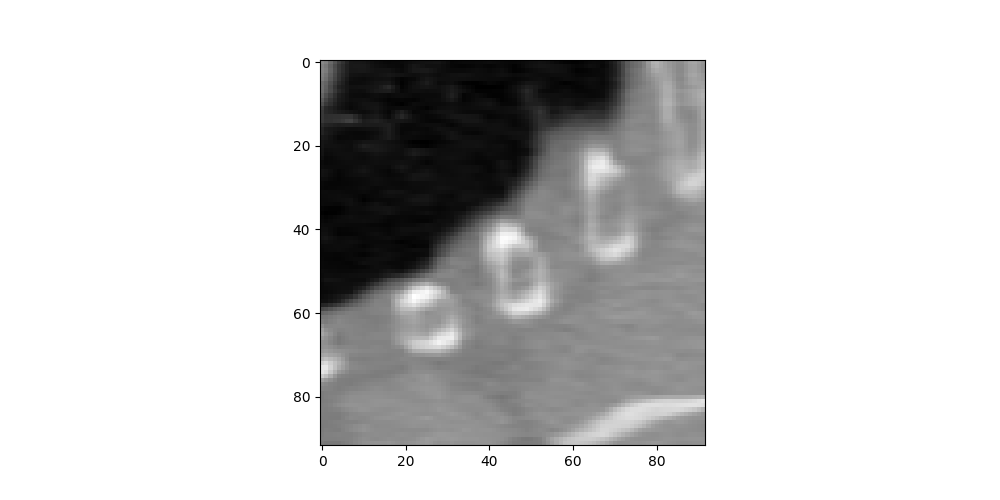

In [8]:
archive = np.load(image_paths[0])
scan = archive['scan']
mask = archive['mask']
print(mask.shape)
plt.figure(figsize=(10, 5))
plt.imshow(scan[0], cmap='gray')
plt.show()

In [4]:
plt.figure(figsize=(10, 5))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    img = np.load(image_paths[i])

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [9]:
clinical_df.head()

,PatientID,Histology,Mstage,Nstage,SourceDataset,Tstage,age
0,202,Adenocarcinoma,0,0,l2,2,66.0000
1,371,large cell,0,2,l1,4,64.5722
2,246,squamous cell carcinoma,0,3,l1,2,66.0452
3,240,nos,0,2,l1,3,59.3566
4,284,squamous cell carcinoma,0,3,l1,4,71.0554


In [17]:
print(clinical_df.Mstage.unique())
print(clinical_df.Nstage.unique())
print(clinical_df.Tstage.unique())
print(clinical_df.SourceDataset.unique())
print(clinical_df.age.mean())
print(clinical_df.age.std())
print(clinical_df.age.min())
print(clinical_df.age.max())

[0 3 1]
[0 2 3 1]
[2 4 3 1 5]
['l2' 'l1']
68.7668559859155
9.587605450840622
42.5133
87.1266


In [46]:
results.head()

,PatientID,SurvivalTime,Event
0,202,1378,0
1,371,379,1
2,246,573,1
3,240,959,0
4,284,2119,0


In [49]:
results.Event.mean()

0.54

In [23]:
!pip install opencv-python

    100% |████████████████████████████████| 28.3MB 66kB/s  eta 0:00:01


<IPython.core.display.Javascript object>


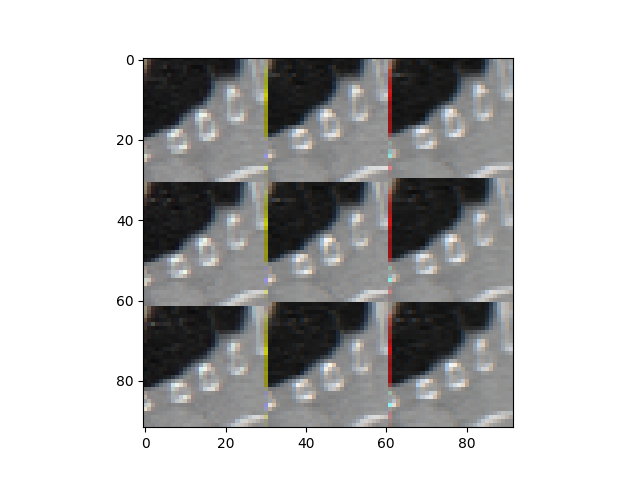

In [22]:
img = ToPILImage()(np.uint8(scan[0]))

img = cv2.normalize(scan, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
img = ToPILImage()(img)

plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

In [65]:
img.shape

(92, 92, 92)